# Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [2]:
# set this so the 
%matplotlib inline

# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv('../data/chipotle.csv')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Step 4. See the first 10 entries

In [4]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Step 5. Create a histogram of the top 5 items bought

In [5]:
x = chipo.item_name
x.head()

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

In [6]:
name_counts = collections.Counter(x)
type(name_counts)

collections.Counter

In [7]:
df = pd.DataFrame.from_dict(name_counts,orient='index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Chips and Fresh Tomato Salsa to Carnitas Salad
Data columns (total 1 columns):
0    50 non-null int64
dtypes: int64(1)
memory usage: 800.0+ bytes


In [8]:
df.head()

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [9]:
df.sort_values(by=df.columns[0],ascending=False)

,0
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Steak Bowl,211
Chips,211
Bottled Water,162
Chicken Soft Tacos,115
Chips and Fresh Tomato Salsa,110


In [10]:
df[0].shape

(50,)

<Figure size 432x288 with 0 Axes>

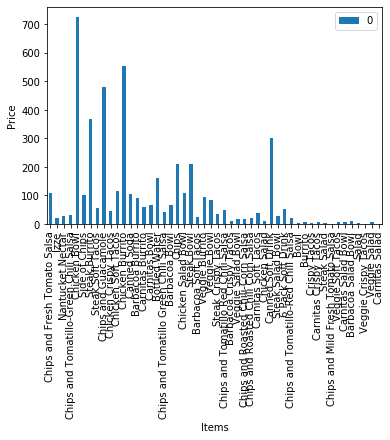

In [11]:
plt.clf()
ax = df.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Price')
plt.legend()

# Step 6. Create a scatterplot with the number of items orderered per order price

In [12]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [13]:
chipo.item_price = chipo.item_price.apply(lambda x : float(x[1:-1]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [17]:
orders = chipo.groupby('order_id').sum()
orders.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


(0, 36.70799877075557)

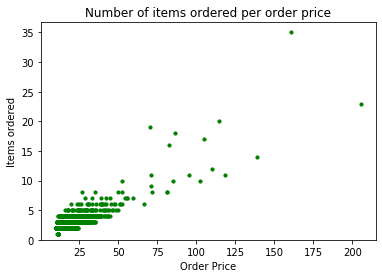

In [22]:
plt.scatter(x = orders.item_price,y = orders.quantity,s=10,c='green')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)